In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import jax.numpy as jnp
import multihist as mh

import appletree as apt
from appletree import randgen
from appletree import Parameter
from appletree.share import PARPATH, DATAPATH
from appletree.components import ERBand

In [2]:
apt.set_gpu_memory_usage(0.2)

# Define context

In [3]:
data = pd.read_csv(os.path.join(DATAPATH, 'data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv'))
bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[1e2, 1e4],
    which_np=jnp
)

In [4]:
er = ERBand(bins=[bins_cs1, bins_cs2], bins_type='irreg')

In [5]:
er.deduce(
    data_names=['cs1', 'cs2'], 
    func_name='simulate'
)

er.compile()

# Parameters

In [6]:
par_manager = Parameter(os.path.join(PARPATH, 'apt_sr0_er.json'))
par_manager.sample_init()
parameters = par_manager.get_all_parameter()

# Simulation

In [7]:
batch_size = int(1e6)
key = randgen.get_key(seed=137)

key, (cs1, cs2, eff) = er.simulate(key, batch_size, parameters)

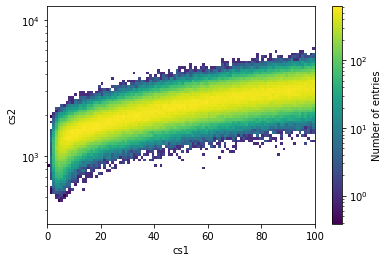

In [8]:
h, be = jnp.histogramdd(
    jnp.asarray([cs1, cs2]).T,
    bins=(jnp.linspace(0, 100, 101), jnp.logspace(2.5, 4.1, 81)),
    weights=eff
)

h = mh.Histdd.from_histogram(
    np.array(h), 
    be, 
    axis_names=['cs1', 'cs2']
)
h.plot(norm=LogNorm())
plt.yscale('log')
plt.show()

# Simulation and make equiprob hist

In [9]:
er.deduce(
    data_names = ['cs1', 'cs2'],
    func_name = 'simulate'
)

er.compile()

/home/xudc/appletree/appletree/component.py:216: UserWarning: function name simulate is already cached. Running compile() will overwrite it.
  warn(warning)


In [10]:
batch_size = int(1e6)
key = randgen.get_key(seed=137)
key, h = er.simulate_hist(key, int(1e6), parameters)

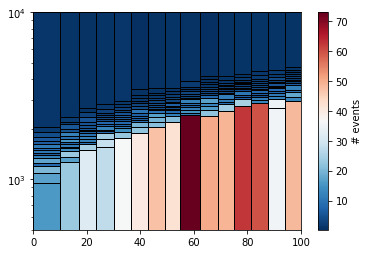

In [11]:
apt.utils.plot_irreg_histogram_2d(bins_cs1, bins_cs2, h, density=False)
plt.yscale('log')
plt.ylim(5e2, 1e4)
plt.show()

# Speed test

In [12]:
@apt.utils.timeit
def test(key, batch_size, parameters):
    return er.simulate_hist(key, batch_size, parameters)

In [13]:
@apt.utils.timeit
def benchmark():
    key = randgen.get_key()
    for _ in range(100):
        key, _ = test(key, int(1e6), parameters)

In [14]:
benchmark()

 Function <benchmark> starts. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.641605 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.633499 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.602505 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 3.829956 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 5.757332 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.065369 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.424427 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.228685 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.222486 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.340504 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.399155 msec. 
 Function <test> starts. 
 Function <test> ends! Time cost = 6.310701 msec. 
 Function <test> starts. 
 Function <test> en